<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/%ED%95%B4%EC%84%A4/ch03_02_NLP%EA%B8%B0%EC%B4%88_imdb%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02 NLP기초 - imdb 리뷰 분류
---

* 날짜:
* 이름:

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      * 텍스트 토큰화
      * 텍스트 인덱싱
      * 원-핫 인코딩
      * 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.



```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 695, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 695 (delta 163), reused 255 (delta 155), pack-reused 427
Receiving objects: 100% (695/695), 38.00 MiB | 23.74 MiB/s, done.
Resolving deltas: 100% (356/356), done.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *

## FCN 모델을 이용한 영화리뷰 분류
---

### **| 데이터 처리**

In [3]:
from tensorflow.keras.datasets import imdb
# FCN : Fully connected network (Dense layer)
max_features = 500 # 많은 단어를 사용할 수록 성능 향상? -> 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다.
max_len = 100 # 문장안에 존재할 최대 단어수
# 문장 -> (단어의 개수 , 각 단어 벡터길이)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features ) # 몇개의 단어를 사용할 것인가 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,) (25000,) (25000,)


In [4]:
print('첫번째 리뷰:', x_train[0], )
print('첫번째 리뷰의 단어 개수:', len(x_train[0]))
print('첫번째 리뷰의 클래스:', y_train[0])

첫번째 리뷰: [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
첫번째 리뷰의 단어 개수: 218
첫번째 리뷰의 클래스: 1


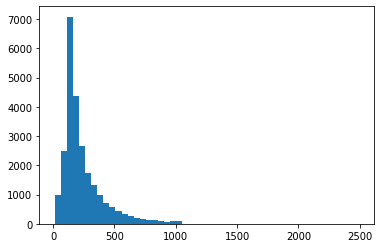

In [5]:
# 문장 안에 단어가 몇개씩 들어있는가?
x_lens = [len(x) for x in x_train]
_=plt.hist(x_lens, bins=50)

In [6]:
# 딕셔너리
word2index = imdb.get_word_index()
#word2index

1654784/1641221 [==============================] - 0s 0us/step


In [14]:
index2word = {}
for word, idx in word2index.items():
  index2word[idx+3]=word

In [22]:
# 첫번째 리뷰 해석
review = x_train[3]
trans = []
for index in review:
  if index in index2word.keys():
    trans.append(index2word[index])
print(' '.join(x for x in trans))
print(review)

the at the sort many years after the i can still see in my an my mother the of she makes the characters come her is that of an one to the on the a or so from where she lives br br of course it many years before she was but you guess from the way she it the same story is in the and of as i it with a friend one night in a in to give his version the to time br br down like this become part of our being who doesn't remember the our us when we were children they become our world and as we they maybe still as or as an fact and with role and br br my name is like my and his before him our himself to us and also the story that back through it that the of its in the of yet is in this is what gives it its special it has a and with some of the you will ever br br his in before his death he with part of him to be in the first to out in but he is on the a br br yet there is a him he to know the the behind his where does end and he wants to know the behind the death of his br br he is to make a last

In [21]:
print('imdb 데이터에 있는 모든 단어수 : ', len(word2index), len(index2word))
print('우리가 사용할 단어수 :', max_features)
# 빈도수 순으로 500개 단어에 대해서만 원핫

imdb 데이터에 있는 모든 단어수 :  88584 88584
우리가 사용할 단어수 : 500


In [27]:
print('빈도가 높은 단어:', index2word[4], index2word[5], index2word[6])

빈도가 높은 단어: the and a


In [30]:
from tensorflow.keras.datasets import imdb
# FCN : Fully connected network (Dense layer)
max_features = 500 # 많은 단어를 사용할 수록 성능 향상? -> 다차원 데이터를 다루기 위해서는 FCN으로는 어렵다.
max_len = 100 # 문장안에 존재할 최대 단어수
# 문장 -> (단어의 개수 , 각 단어 벡터길이)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features ) # 몇개의 단어를 사용할 것인가 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

print('패딩 전:', x_train.shape, y_test.shape)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
print('패딩 후:', x_train.shape, x_test.shape)

(25000,) (25000,) (25000,) (25000,)
패딩 전: (25000,) (25000,)
패딩 후: (25000, 100) (25000, 100)


In [ ]:
x_train[0]

### **| 모델 학습**

In [36]:
def create_model(max_len, max_features, emb_dims):
  x = layers.Input(shape=max_len)
  y = layers.Embedding(max_features, emb_dims)(x)
  y = layers.Flatten()(y)
  y = layers.Dense(32, activation='relu')(y)
  y = layers.Dense(1, activation='sigmoid')(y) # 이진분류
  return models.Model(x,y)

In [37]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5202 - acc: 0.7284 - val_loss: 0.4496 - val_acc: 0.7874
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3521 - acc: 0.8452 - val_loss: 0.4876 - val_acc: 0.7828
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2107 - acc: 0.9153 - val_loss: 0.6107 - val_acc: 0.7582
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0933 - acc: 0.9667 - val_loss: 0.8172 - val_acc: 0.7542
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0430 - acc: 0.9861 - val_loss: 1.0484 - val_acc: 0.7528
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0257 - acc: 0.9923 - val_loss: 1.2601 - val_acc: 0.7482
Epoch 7/20
625/625 [==============================] - 4s 6ms/step - loss: 0.0333 - acc: 0.9895 - val_loss: 1.3277 - val_acc: 0.7394
Epoch 8/20
625/625 [==============================] - 4s 6ms/step - loss: 0.

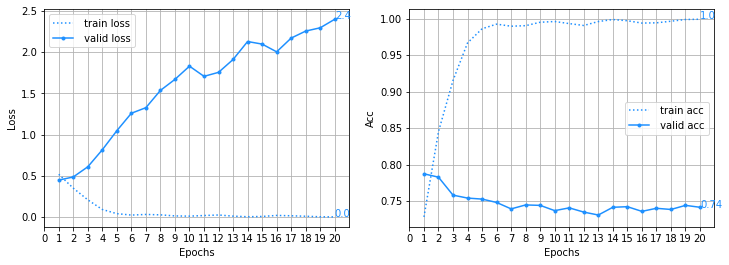

In [40]:
from plot_result import plot_lcurve
plot_lcurve([history], [''], ['dodgerblue'])

## 사전 훈련된 Embedding 사용하기
---



### **| GloVe 단어 임베딩 내려받기**

```
https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download
```

In [39]:
! gdown https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1ams5_zp8NrfmbxSzTDCglRpAvjFGi5JY
To: /content/glove.6B.zip
100% 862M/862M [00:10<00:00, 84.3MB/s]


In [41]:
! unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [48]:
word2embedding = {}
f = open('/content/glove.6B.100d.txt', encoding='utf8')
for line in f:
  word = line.split()[0] # 가장 첫번째가 단어,
  vec = line.split()[1:] # 그 후는 단어에 대한 벡터
  vec = np.asarray(vec, dtype='float32') # 문자-> 실수
  #print(word, len(vec), vec)
  #break
  word2embedding[word] = vec
f.close()

In [51]:
word2embedding['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [52]:
len(word2embedding) # 40만개의 단어

400000

### **| 임베딩 매트릭스 제작**


In [55]:
print('imdb 딕셔너리의 모든 단어 수 :', len(word2index))
print('우리 모델에서 사용할 모든 단어 수 :', max_features)
print('glove 임베딩 에 있는 모든 단어 수 : ', len(word2embedding))

imdb 딕셔너리의 모든 단어 수 : 88584
우리 모델에서 사용할 모든 단어 수 : 500
glove 임베딩 에 있는 모든 단어 수 :  400000


In [66]:
embed_mx = np.zeros((max_features, 100))
# 매트릭스의 크기 : (500, 100)
embed_mx.shape

(500, 100)

In [67]:
for idx in range(4, 504):
  word = index2word[idx]
  embed = word2embedding.get(word) # 딕셔너리.get 함수는 없으면 None값 반환
  #print(word, embed)
  if embed is not None:
    embed_mx[idx-4] = embed

### **| 임베딩 매트릭스 적용하기**

In [73]:
model = create_model(max_len, max_features, 100)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 100, 100)          50000     
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 370,065
Trainable params: 370,065
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.layers[1].set_weights([embed_mx]) # 가중치를 Glove 값으로 초기화

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 0.7147 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6940 - acc: 0.4949 - val_loss: 0.6931 - val_acc: 0.5064
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6937 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6925 - acc: 0.5278 - val_loss: 0.6800 - val_acc: 0.5604
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 0.6127 - acc: 0.6658 - val_loss: 0.5506 - val_acc: 0.7180
Epoch 6/20
625/625 [==============================] - 4s 7ms/step - loss: 0.4768 - acc: 0.7714 - val_loss: 0.4853 - val_acc: 0.7618
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.4129 - acc: 0.8087 - val_loss: 0.4746 - val_acc: 0.7734
Epoch 8/20
625/625 [==============================] - 4s 7ms/step - loss: 0.

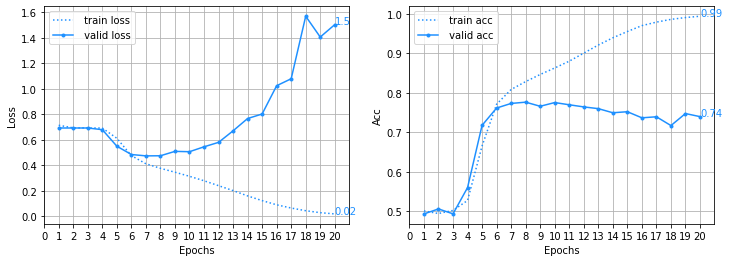

In [75]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)
plot_lcurve([history], [''], ['dodgerblue'])

## 추가 학습 : 규제 적용하기
---